# Data Analytics Project - Covid19 data analysis for year 2020

#### Covid19 has taken the world since 2020 and the data available on Covid on various sources are quite fascinating. This analysis is based on the dataset from Kaggle, which can be found using the following link

[Dataset link](https://www.kaggle.com/shashwatwork/impact-of-covid19-pandemic-on-the-global-economy?select=raw_data.csv![image.png](attachment:image.png)

Before we go into the details, we will go through some quick terms and their definitions to understand the contents of this data

   1. GDP Per Capita
        Per capita gross domestic product (GDP) is a metric that breaks down a country's economic output per person and is calculated by dividing the GDP of a country by its population.
        
   2. Stringency Metric
        It provides a picture of the stage at which any country enforced its strongest measures.
        Some countries saw their deaths just begin to flatten as they reached their highest stringency, such as Italy, Spain, or France.

   3. Human Development Index
        It is a summary measure of average achievement in key dimensions of human development: a long and healthy life, being knowledgeable and have a decent standard of living. ... The HDI is the geometric mean of normalized indices for each of the three dimensions.

For Data Analytics, we have to import certain libraries and work with them.. so here we go

In [46]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure


In [47]:
# Basic Analysis of the raw dataset

pandemic_df = pd.read_csv('dataset/raw_data.csv')
pandemic_df.head(10)

,iso_code,location,date,total_cases,total_deaths,stringency_index,population,gdp_per_capita,human_development_index,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,AFG,Afghanistan,2019-12-31,0.0,0.0,0.0,38928341,1803.987,0.498,#NUM!,#NUM!,#NUM!,17.477233,7.497754494
1,AFG,Afghanistan,2020-01-01,0.0,0.0,0.0,38928341,1803.987,0.498,#NUM!,#NUM!,#NUM!,17.477233,7.497754494
2,AFG,Afghanistan,2020-01-02,0.0,0.0,0.0,38928341,1803.987,0.498,#NUM!,#NUM!,#NUM!,17.477233,7.497754494
3,AFG,Afghanistan,2020-01-03,0.0,0.0,0.0,38928341,1803.987,0.498,#NUM!,#NUM!,#NUM!,17.477233,7.497754494
4,AFG,Afghanistan,2020-01-04,0.0,0.0,0.0,38928341,1803.987,0.498,#NUM!,#NUM!,#NUM!,17.477233,7.497754494
5,AFG,Afghanistan,2020-01-05,0.0,0.0,0.0,38928341,1803.987,0.498,#NUM!,#NUM!,#NUM!,17.477233,7.497754494
6,AFG,Afghanistan,2020-01-06,0.0,0.0,0.0,38928341,1803.987,0.498,#NUM!,#NUM!,#NUM!,17.477233,7.497754494
7,AFG,Afghanistan,2020-01-07,0.0,0.0,0.0,38928341,1803.987,0.498,#NUM!,#NUM!,#NUM!,17.477233,7.497754494
8,AFG,Afghanistan,2020-01-08,0.0,0.0,0.0,38928341,1803.987,0.498,#NUM!,#NUM!,#NUM!,17.477233,7.497754494
9,AFG,Afghanistan,2020-01-09,0.0,0.0,0.0,38928341,1803.987,0.498,#NUM!,#NUM!,#NUM!,17.477233,7.497754494


In [48]:
# number of rows and columns in the raw dataset
pandemic_df.shape

(50418, 14)

In [49]:
pandemic_df.dtypes

iso_code                    object
location                    object
date                        object
total_cases                float64
total_deaths               float64
stringency_index           float64
population                   int64
gdp_per_capita             float64
human_development_index    float64
Unnamed: 9                  object
Unnamed: 10                 object
Unnamed: 11                 object
Unnamed: 12                float64
Unnamed: 13                 object
dtype: object

## Cleaning the dataset
### The above dataset contains some extra columns to the right, which seem to be generated and will not be included as part of the analysis, hence we can safely drop those columns.

In [50]:
# drop the last 5 columns of the dataset as they show some computed value which is not required for analysis
pandemic_df.drop(columns = ['Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13'], axis = 1, inplace = True)
pandemic_df

,iso_code,location,date,total_cases,total_deaths,stringency_index,population,gdp_per_capita,human_development_index
0,AFG,Afghanistan,2019-12-31,0.0,0.0,0.00,38928341,1803.987,0.498
1,AFG,Afghanistan,2020-01-01,0.0,0.0,0.00,38928341,1803.987,0.498
2,AFG,Afghanistan,2020-01-02,0.0,0.0,0.00,38928341,1803.987,0.498
3,AFG,Afghanistan,2020-01-03,0.0,0.0,0.00,38928341,1803.987,0.498
4,AFG,Afghanistan,2020-01-04,0.0,0.0,0.00,38928341,1803.987,0.498
...,...,...,...,...,...,...,...,...,...
50413,ZWE,Zimbabwe,2020-10-15,8055.0,231.0,76.85,14862927,1899.775,0.535
50414,ZWE,Zimbabwe,2020-10-16,8075.0,231.0,76.85,14862927,1899.775,0.535
50415,ZWE,Zimbabwe,2020-10-17,8099.0,231.0,76.85,14862927,1899.775,0.535
50416,ZWE,Zimbabwe,2020-10-18,8110.0,231.0,76.85,14862927,1899.775,0.535


## Dealing with null values in the dataset

In [51]:
# checking if there is a null value in any of the rows of the dataset
pandemic_df.isnull().values.any()

True

In [52]:
# finding the number of null values in each column
pandemic_df.isnull().sum()

iso_code                       0
location                       0
date                           0
total_cases                 3094
total_deaths               11190
stringency_index            7126
population                     0
gdp_per_capita              5712
human_development_index     6202
dtype: int64

In [53]:
# print the rows which has null values
null_df = pandemic_df[pandemic_df.isna().any(axis=1)]
null_df

,iso_code,location,date,total_cases,total_deaths,stringency_index,population,gdp_per_capita,human_development_index
280,AFG,Afghanistan,2020-10-06,39486.0,1467.0,NaN,38928341,1803.987,0.498
281,AFG,Afghanistan,2020-10-07,39548.0,1469.0,NaN,38928341,1803.987,0.498
282,AFG,Afghanistan,2020-10-08,39616.0,1470.0,NaN,38928341,1803.987,0.498
283,AFG,Afghanistan,2020-10-09,39693.0,1472.0,NaN,38928341,1803.987,0.498
284,AFG,Afghanistan,2020-10-10,39703.0,1473.0,NaN,38928341,1803.987,0.498
...,...,...,...,...,...,...,...,...,...
50203,ZMB,Zambia,2020-10-18,15789.0,346.0,NaN,18383956,3689.251,0.588
50204,ZMB,Zambia,2020-10-19,15853.0,346.0,NaN,18383956,3689.251,0.588
50205,ZWE,Zimbabwe,2020-03-21,1.0,NaN,27.78,14862927,1899.775,0.535
50206,ZWE,Zimbabwe,2020-03-22,2.0,NaN,27.78,14862927,1899.775,0.535


In [54]:
# column names of dataset
pandemic_df.columns

Index(['iso_code', 'location', 'date', 'total_cases', 'total_deaths',
       'stringency_index', 'population', 'gdp_per_capita',
       'human_development_index'],
      dtype='object')

In [55]:
# convert the 'Date' column to datetime format
pandemic_df['date'] = pd.to_datetime(pandemic_df['date'])

In [56]:
# convert float64 to int64 for total_cases and total_deaths
pandemic_df['total_cases'] = pandemic_df['total_cases'].fillna(0)
pandemic_df['total_cases'] = pandemic_df['total_cases'].astype(np.int64)
pandemic_df['total_deaths'] = pandemic_df['total_deaths'].fillna(0)
pandemic_df['total_deaths'] = pandemic_df['total_deaths'].astype(np.int64)
pandemic_df['stringency_index'] = pandemic_df['stringency_index'].fillna(method='bfill')
pandemic_df.dtypes

iso_code                           object
location                           object
date                       datetime64[ns]
total_cases                         int64
total_deaths                        int64
stringency_index                  float64
population                          int64
gdp_per_capita                    float64
human_development_index           float64
dtype: object

    * Lets do a quick check on any single country's data, for ex. Brazil

In [57]:
# Data check for Brazil

brazil_df = pandemic_df.loc[pandemic_df['location'] == 'Brazil'].head(10)
brazil_df

,iso_code,location,date,total_cases,total_deaths,stringency_index,population,gdp_per_capita,human_development_index
6571,BRA,Brazil,2019-12-31,0,0,0.0,212559409,14103.452,0.759
6572,BRA,Brazil,2020-01-01,0,0,0.0,212559409,14103.452,0.759
6573,BRA,Brazil,2020-01-02,0,0,0.0,212559409,14103.452,0.759
6574,BRA,Brazil,2020-01-03,0,0,0.0,212559409,14103.452,0.759
6575,BRA,Brazil,2020-01-04,0,0,0.0,212559409,14103.452,0.759
6576,BRA,Brazil,2020-01-05,0,0,0.0,212559409,14103.452,0.759
6577,BRA,Brazil,2020-01-06,0,0,0.0,212559409,14103.452,0.759
6578,BRA,Brazil,2020-01-07,0,0,0.0,212559409,14103.452,0.759
6579,BRA,Brazil,2020-01-08,0,0,0.0,212559409,14103.452,0.759
6580,BRA,Brazil,2020-01-09,0,0,0.0,212559409,14103.452,0.759


In [58]:
#  I decide to fill in the stringency index for brazil as some values were missing in the original dataset
brazil_df['month'] = pd.to_datetime(pandemic_df['date']).dt.month
brazil_df.groupby(['location', 'month']).agg(
    {
        'total_cases': 'sum', 
        'total_deaths': 'sum', 
        'stringency_index': 'mean',
        'population': 'first',
        'gdp_per_capita': 'first',
        'human_development_index': 'mean',
    })

total_cases  total_deaths  stringency_index  population  \
location month                                                            
Brazil   1                0             0               0.0   212559409   
         12               0             0               0.0   212559409   

                gdp_per_capita  human_development_index  
location month                                           
Brazil   1           14103.452                    0.759  
         12          14103.452                    0.759

In [59]:
df_inter = pandemic_df.interpolate()
df_inter.dtypes

iso_code                           object
location                           object
date                       datetime64[ns]
total_cases                         int64
total_deaths                        int64
stringency_index                  float64
population                          int64
gdp_per_capita                    float64
human_development_index           float64
dtype: object

In [60]:
# adding two more columns to the dataset

df_inter['month'] = df_inter['date'].dt.month
df_inter['year'] = df_inter['date'].dt.year
df_inter

,iso_code,location,date,total_cases,total_deaths,stringency_index,population,gdp_per_capita,human_development_index,month,year
0,AFG,Afghanistan,2019-12-31,0,0,0.00,38928341,1803.987,0.498,12,2019
1,AFG,Afghanistan,2020-01-01,0,0,0.00,38928341,1803.987,0.498,1,2020
2,AFG,Afghanistan,2020-01-02,0,0,0.00,38928341,1803.987,0.498,1,2020
3,AFG,Afghanistan,2020-01-03,0,0,0.00,38928341,1803.987,0.498,1,2020
4,AFG,Afghanistan,2020-01-04,0,0,0.00,38928341,1803.987,0.498,1,2020
...,...,...,...,...,...,...,...,...,...,...,...
50413,ZWE,Zimbabwe,2020-10-15,8055,231,76.85,14862927,1899.775,0.535,10,2020
50414,ZWE,Zimbabwe,2020-10-16,8075,231,76.85,14862927,1899.775,0.535,10,2020
50415,ZWE,Zimbabwe,2020-10-17,8099,231,76.85,14862927,1899.775,0.535,10,2020
50416,ZWE,Zimbabwe,2020-10-18,8110,231,76.85,14862927,1899.775,0.535,10,2020


In [61]:
df_inter.to_csv('dataset/transformed_pandemic_data.csv') # keep this for regression analysis

## Grouping the dataset
### Grouping the dataset by Location and then my Month, (The month column has been computed and added, this is derived from the Date column)

In [20]:
df_grouped = df_inter.groupby(['location', 'month'], as_index=False).agg(
    {
        'total_cases': 'max', 
        'total_deaths': 'max', 
        'stringency_index': 'mean',
        'population': 'first',
        'gdp_per_capita': 'first',
        'human_development_index': 'first',
    })
df_grouped


,location,month,total_cases,total_deaths,stringency_index,population,gdp_per_capita,human_development_index
0,Afghanistan,1,0,0,0.000000,38928341,1803.987,0.498
1,Afghanistan,2,1,0,2.010690,38928341,1803.987,0.498
2,Afghanistan,3,141,4,40.831935,38928341,1803.987,0.498
3,Afghanistan,4,1949,60,80.740000,38928341,1803.987,0.498
4,Afghanistan,5,14525,249,84.260000,38928341,1803.987,0.498
...,...,...,...,...,...,...,...,...
1865,Zimbabwe,6,574,7,72.715333,14862927,1899.775,0.535
1866,Zimbabwe,7,3092,53,76.583548,14862927,1899.775,0.535
1867,Zimbabwe,8,6412,196,80.560000,14862927,1899.775,0.535
1868,Zimbabwe,9,7837,228,78.457667,14862927,1899.775,0.535


## Drop rows with missing or 0 values for stringency_index, total_cases and total_deaths

In [21]:
# drop the rows with 0 values for the columns : stringency_index, total_cases and total_deaths
# get names of indexes for which columns have value == 01

index_names = df_grouped[(df_grouped['stringency_index'] == 0) & (df_grouped['total_deaths'] == 0) & (df_grouped['total_cases'] == 0)].index
df_grouped.drop(index_names, inplace = True)

df_grouped

,location,month,total_cases,total_deaths,stringency_index,population,gdp_per_capita,human_development_index
1,Afghanistan,2,1,0,2.010690,38928341,1803.987,0.498
2,Afghanistan,3,141,4,40.831935,38928341,1803.987,0.498
3,Afghanistan,4,1949,60,80.740000,38928341,1803.987,0.498
4,Afghanistan,5,14525,249,84.260000,38928341,1803.987,0.498
5,Afghanistan,6,31238,733,80.182667,38928341,1803.987,0.498
...,...,...,...,...,...,...,...,...
1865,Zimbabwe,6,574,7,72.715333,14862927,1899.775,0.535
1866,Zimbabwe,7,3092,53,76.583548,14862927,1899.775,0.535
1867,Zimbabwe,8,6412,196,80.560000,14862927,1899.775,0.535
1868,Zimbabwe,9,7837,228,78.457667,14862927,1899.775,0.535


In [22]:
# the df_final dataset holds the desired data which can be used for further analysis
# df_grouped.to_csv('scrubbed_pandemic_final.csv')

In [23]:
# testing the final dataset with an example country "Brazil"
df_grouped[df_grouped['location'] == 'India']

,location,month,total_cases,total_deaths,stringency_index,population,gdp_per_capita,human_development_index
798,India,1,1,0,2.151613,1380004385,6426.674,0.64
799,India,2,3,0,10.190000,1380004385,6426.674,0.64
800,India,3,1251,32,54.703871,1380004385,6426.674,0.64
801,India,4,33050,1074,98.643333,1380004385,6426.674,0.64
802,India,5,182143,5164,82.078710,1380004385,6426.674,0.64
803,India,6,566840,16893,76.280000,1380004385,6426.674,0.64
804,India,7,1638870,35747,76.702903,1380004385,6426.674,0.64
805,India,8,3621245,64469,79.764516,1380004385,6426.674,0.64
806,India,9,6225763,97497,79.105000,1380004385,6426.674,0.64
807,India,10,7550273,114610,50.364737,1380004385,6426.674,0.64


# Visualizations with matplotlib and seaborn

## Plotting countrywise population from the dataset

In [24]:
df_pop = df_grouped.sort_values("population", ascending=False)
df_pop

,location,month,total_cases,total_deaths,stringency_index,population,gdp_per_capita,human_development_index
363,China,2,79355,2837,76.992759,1439323774,15308.712000,0.752000
371,China,10,90972,4739,27.561579,1439323774,15308.712000,0.752000
364,China,3,82241,3309,79.526452,1439323774,15308.712000,0.752000
365,China,4,83944,4637,60.213000,1439323774,15308.712000,0.752000
366,China,5,84128,4638,74.681935,1439323774,15308.712000,0.752000
...,...,...,...,...,...,...,...,...
1821,Vatican,4,10,0,51.850000,809,7241.132152,0.714803
1825,Vatican,8,12,0,51.850000,809,12981.105229,0.742704
1826,Vatican,9,12,0,51.850000,809,14439.622978,0.749794
1827,Vatican,10,26,0,51.850000,809,15851.091767,0.756655


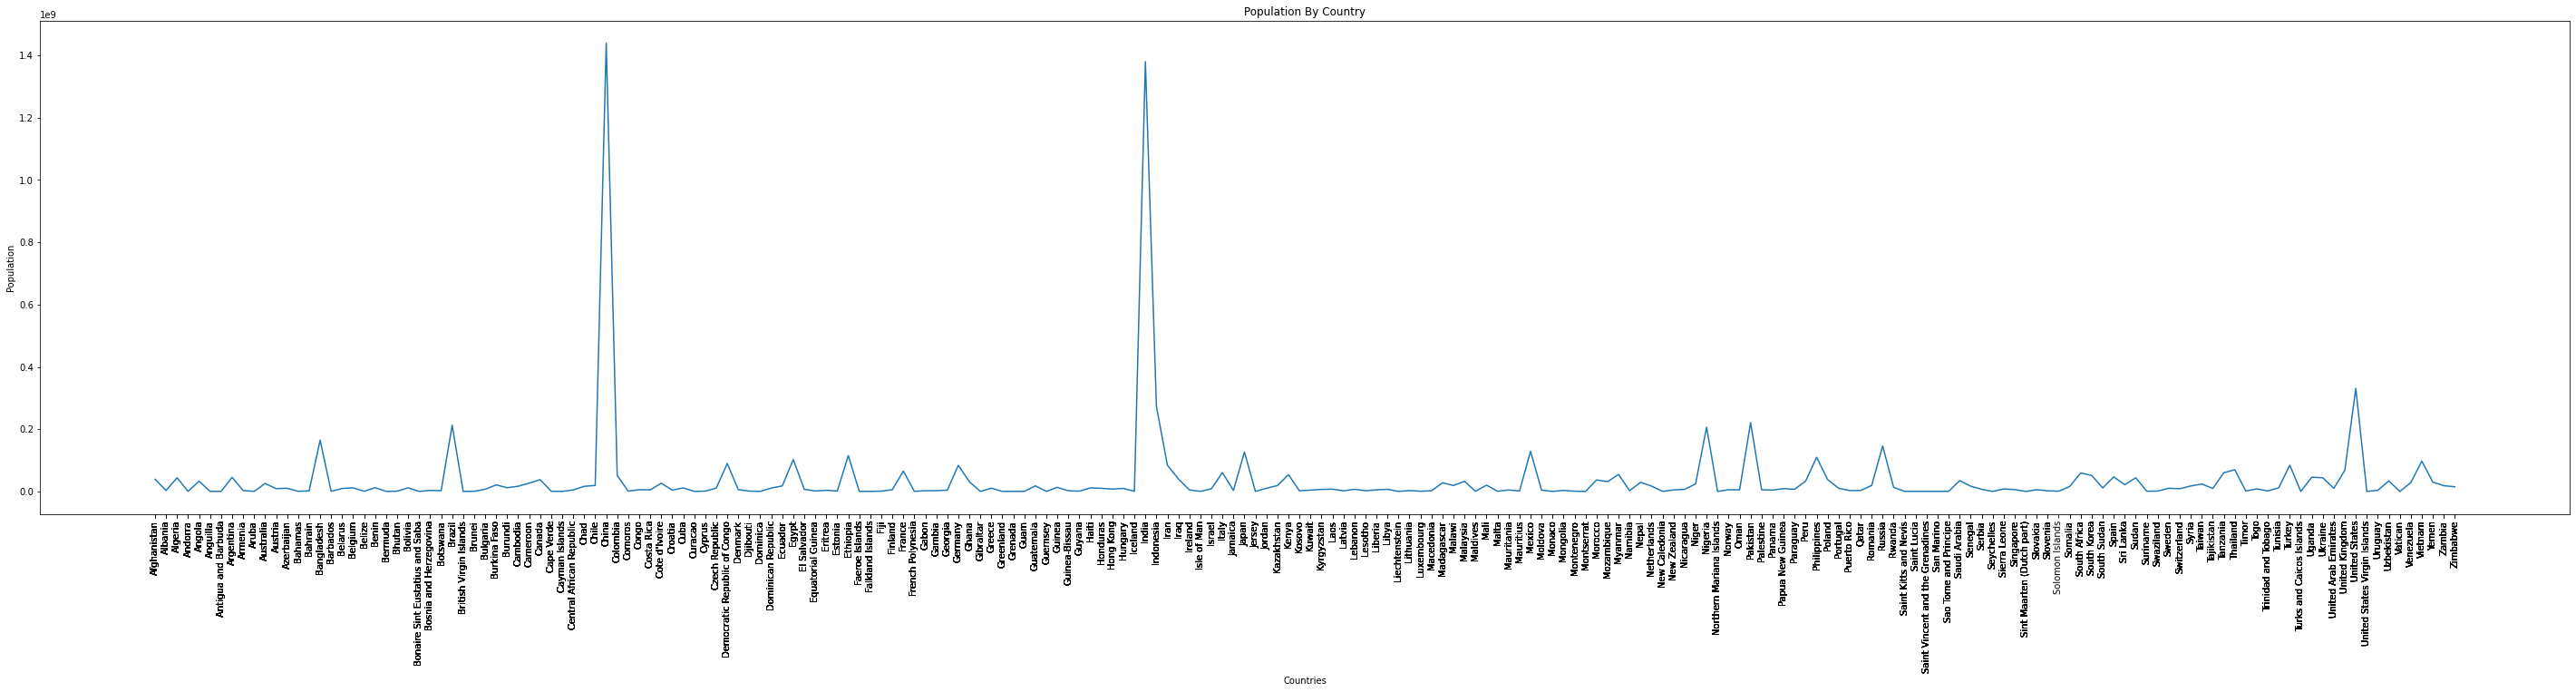

In [25]:
figure(figsize=(50, 10))

plt.plot(df_grouped['location'], df_grouped['population'])
plt.title('Population By Country')
plt.xlabel('Countries')
plt.ylabel('Population')

plt.xticks(df_pop['location'], label="Countries", rotation=90)

plt.show()

## Histogram plot for total_cases and total_deaths

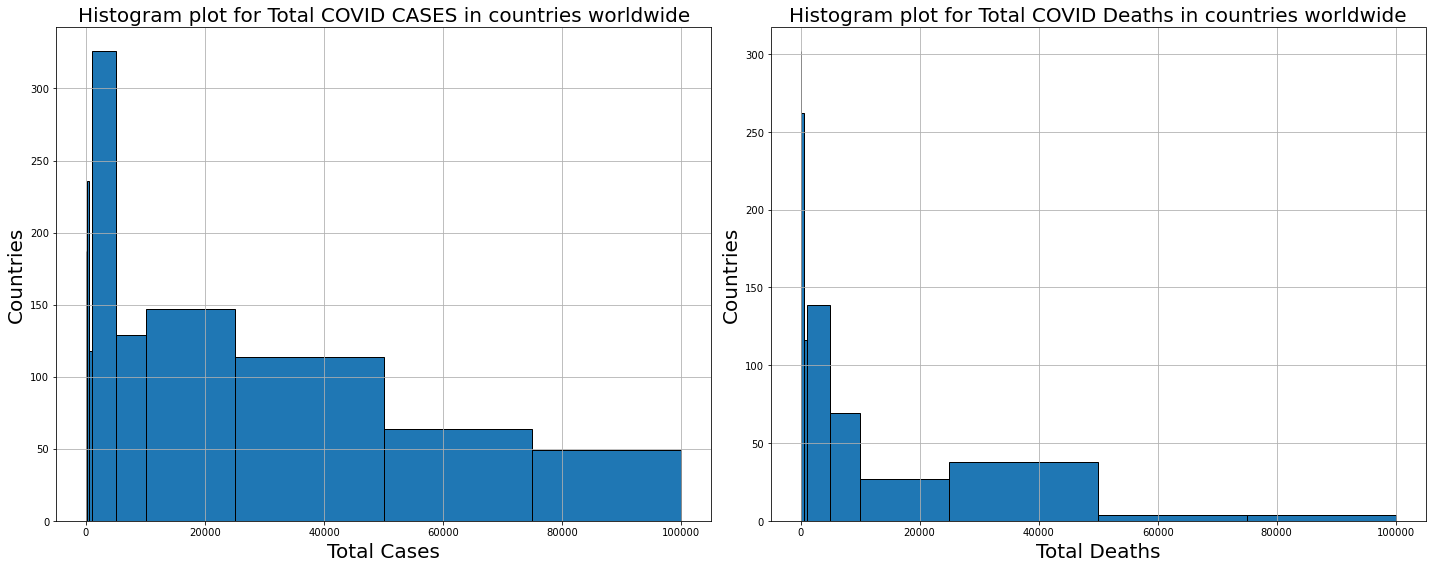

In [26]:
fig = plt.figure(figsize=(20,15))
_bins = [10,50,100,500,1000,5000,10000,25000,50000,75000,100000]

ax1 = fig.add_subplot(2,2,1)

ax1.hist(df_pop['total_cases'],bins=_bins, edgecolor='black')
ax1.set_title('Histogram plot for Total COVID CASES in countries worldwide',  fontsize=20)
ax1.set_ylabel('Countries',  fontsize=20)
ax1.set_xlabel('Total Cases', fontsize=20)
ax1.grid(which='both')

ax2 = fig.add_subplot(2,2,2) 
ax2.hist(df_pop['total_deaths'], bins=_bins, edgecolor='black')
ax2.set_title('Histogram plot for Total COVID Deaths in countries worldwide', fontsize=20)
ax2.set_ylabel('Countries', fontsize=20)
ax2.set_xlabel('Total Deaths', fontsize=20)
ax2.grid(which='both')

plt.tight_layout()

In [27]:
# name of all countries countries
df_pop['location'].value_counts()

Macedonia          11
Taiwan             11
China              11
Monaco             11
Cambodia           10
                   ..
Burundi             7
Tajikistan          6
Lesotho             6
Comoros             6
Solomon Islands     1
Name: location, Length: 210, dtype: int64

In [28]:
# grouping the data further by countries
country_agg = df_pop.groupby(["location"], as_index=False).agg(
    {
     'total_cases': 'sum', 
     'total_deaths':'sum', 
     'stringency_index': 'mean', 
     'population': 'first', 
     'gdp_per_capita': 'first', 
     'human_development_index': 'first'
    })

country_agg

,location,total_cases,total_deaths,stringency_index,population,gdp_per_capita,human_development_index
0,Afghanistan,202012,6669,53.247755,38928341,1803.987000,0.498
1,Albania,49727,1403,61.465869,2877800,11803.431000,0.785
2,Algeria,207018,8313,60.909531,43851043,13913.839000,0.754
3,Andorra,10121,370,40.203210,77265,9777.522242,0.858
4,Angola,16463,594,75.591247,32866268,5819.495000,0.581
...,...,...,...,...,...,...,...
205,Venezuela,232181,1971,81.239320,28435943,16745.022000,0.761
206,Vietnam,4956,102,56.485342,97338583,6171.884000,0.694
207,Yemen,9217,2617,42.450945,29825968,1479.147000,0.452
208,Zambia,50905,1146,45.666856,18383956,3689.251000,0.588


### For a better understanding of the plots, we will carry on with the rest of the plots with top 20 highly populated countries

In [29]:
# sorting the group data by countries with Highest population at the top
sort_coun_agg = country_agg.sort_values("population", ascending=False)
df_selcoun = sort_coun_agg.head(20)
df_selcoun.head(30)

,location,total_cases,total_deaths,stringency_index,population,gdp_per_capita,human_development_index
41,China,783073,39134,59.871230,1439323774,15308.712,0.752
90,India,19819439,335486,60.998468,1380004385,6426.674,0.640
200,United States,31403370,1054868,52.540198,331002647,54225.446,0.924
91,Indonesia,1015030,40797,50.234151,273523621,11188.744,0.694
145,Pakistan,1506088,31534,51.910775,220892331,5034.708,0.562
27,Brazil,18434656,601690,58.123214,212559409,14103.452,0.759
141,Nigeria,253489,5026,51.406610,206139587,5338.454,0.532
15,Bangladesh,1489884,20771,73.628312,164689383,3523.984,0.608
157,Russia,5530932,90330,50.978774,145934460,24765.954,0.816
125,Mexico,3164161,312148,50.888418,128932753,17336.469,0.774


In [30]:
sort_coun_agg.columns

Index(['location', 'total_cases', 'total_deaths', 'stringency_index',
       'population', 'gdp_per_capita', 'human_development_index'],
      dtype='object')

In [31]:
# Rename columns
df_selcoun = df_selcoun.rename(columns = {'location':'loc', 'stringency_index': 'SI', 'population': 'pop', 'gdp_per_capita':'GDP', 'human_development_index': 'HDI'})
df_selcoun.columns

Index(['loc', 'total_cases', 'total_deaths', 'SI', 'pop', 'GDP', 'HDI'], dtype='object')

### Following are 4 plots, with shows country-wise population (1), country-wise HDI (2), country-wise Stringency Index (3) and country-wise HDI

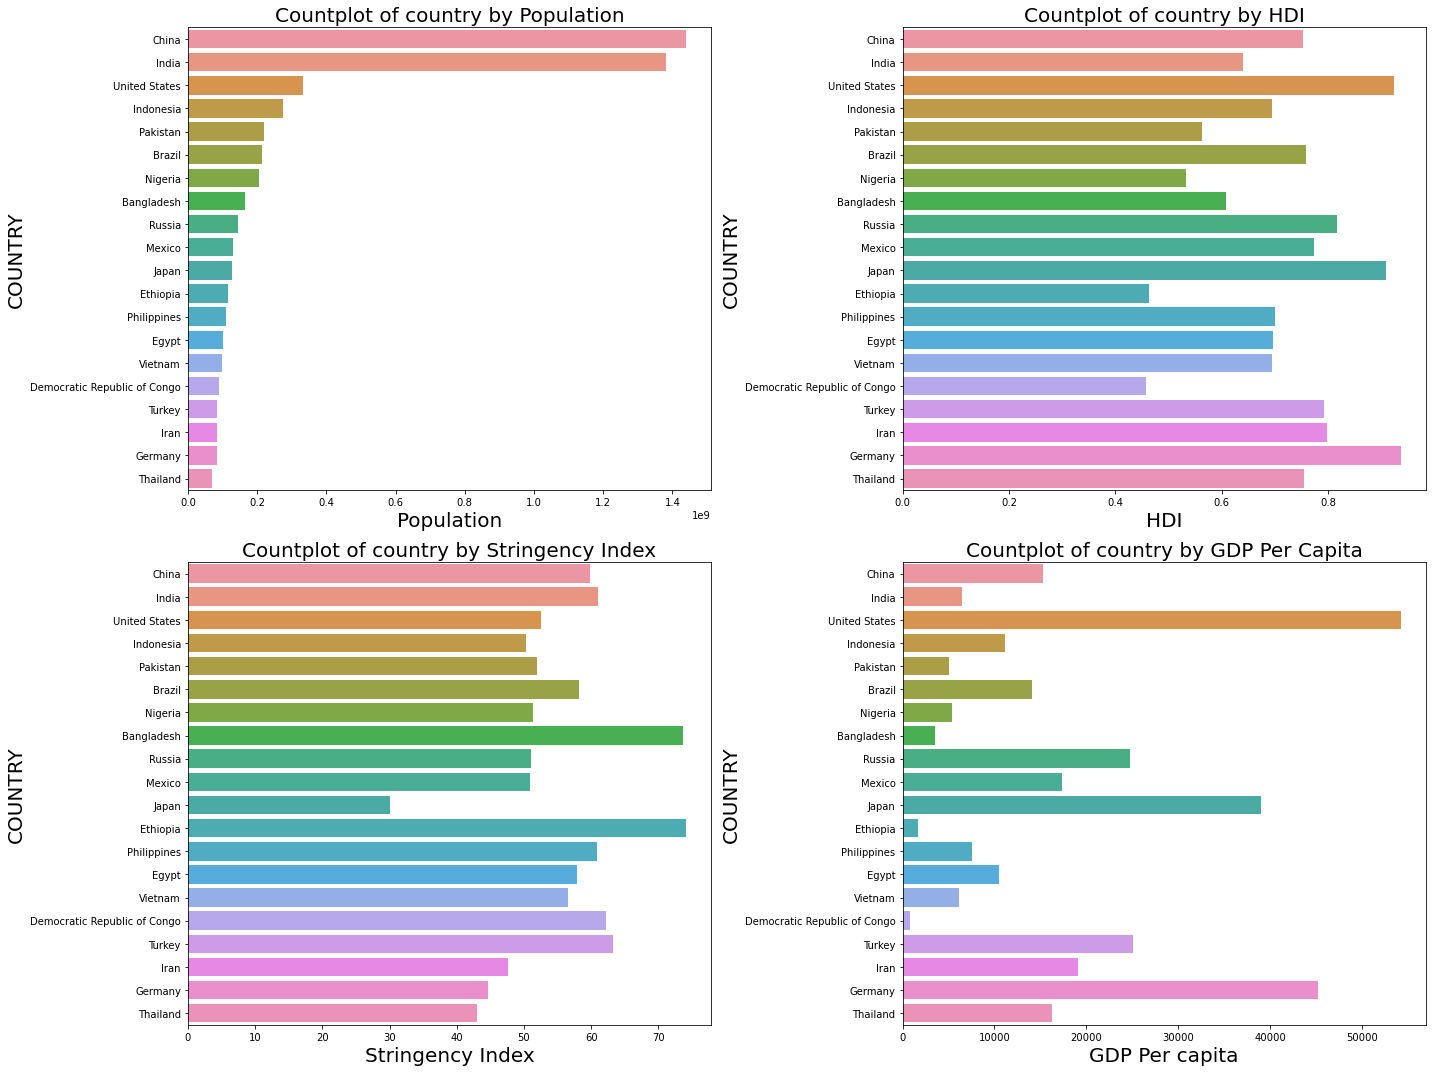

In [32]:
fig = plt.figure(figsize=(20,15))

ax1 = fig.add_subplot(2,2,1) 
sns.barplot(x=df_selcoun['pop'], y=df_selcoun['loc'])
ax1.set_xlabel('Population', fontsize=20)
ax1.set_ylabel('COUNTRY', fontsize=20)
ax1.set_title('Countplot of country by Population', fontsize=20)

ax2 = fig.add_subplot(2,2,2)
sns.barplot(x=df_selcoun['HDI'], y=df_selcoun['loc'])
ax2.set_xlabel('HDI', fontsize=20)
ax2.set_ylabel('COUNTRY', fontsize=20)
ax2.set_title('Countplot of country by HDI', fontsize=20)

ax3 = fig.add_subplot(2,2,3) 
sns.barplot(x=df_selcoun['SI'], y=df_selcoun['loc'])
ax3.set_xlabel('Stringency Index', fontsize=20)
ax3.set_ylabel('COUNTRY', fontsize=20)
ax3.set_title('Countplot of country by Stringency Index', fontsize=20)

ax4 = fig.add_subplot(2,2,4)
sns.barplot(x=df_selcoun['GDP'], y=df_selcoun['loc'])
ax4.set_xlabel('GDP Per capita', fontsize=20)
ax4.set_ylabel('COUNTRY', fontsize=20)
ax4.set_title('Countplot of country by GDP Per Capita', fontsize=20)

plt.tight_layout()


### How is HDI related to population for the 20 most highly populated countries as per the data sheet

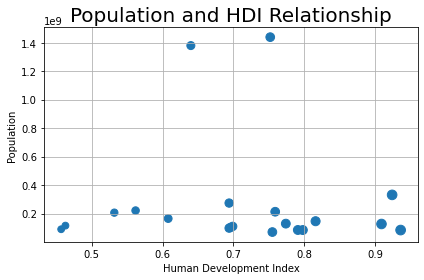

In [33]:
fig, ax = plt.subplots()
# fig.set_size_inches(15, 8, forward=True)
ax.scatter(df_selcoun['HDI'], df_selcoun['pop'], s=df_selcoun['HDI']*100)
ax.set_xlabel('Human Development Index')
ax.set_ylabel('Population')
ax.set_title('Population and HDI Relationship', fontsize=20)
ax.grid(which="both")
plt.tight_layout()

# less populated countries have a higher Human Development Index

### Now lets dig into more details with a country, here we will take the case of India. 
### total_cases and total_deaths plot over a period of the year of 2020

In [34]:
_df = df_grouped[df_grouped['location'] == 'India']
_df.head(20)

,location,month,total_cases,total_deaths,stringency_index,population,gdp_per_capita,human_development_index
798,India,1,1,0,2.151613,1380004385,6426.674,0.64
799,India,2,3,0,10.190000,1380004385,6426.674,0.64
800,India,3,1251,32,54.703871,1380004385,6426.674,0.64
801,India,4,33050,1074,98.643333,1380004385,6426.674,0.64
802,India,5,182143,5164,82.078710,1380004385,6426.674,0.64
803,India,6,566840,16893,76.280000,1380004385,6426.674,0.64
804,India,7,1638870,35747,76.702903,1380004385,6426.674,0.64
805,India,8,3621245,64469,79.764516,1380004385,6426.674,0.64
806,India,9,6225763,97497,79.105000,1380004385,6426.674,0.64
807,India,10,7550273,114610,50.364737,1380004385,6426.674,0.64


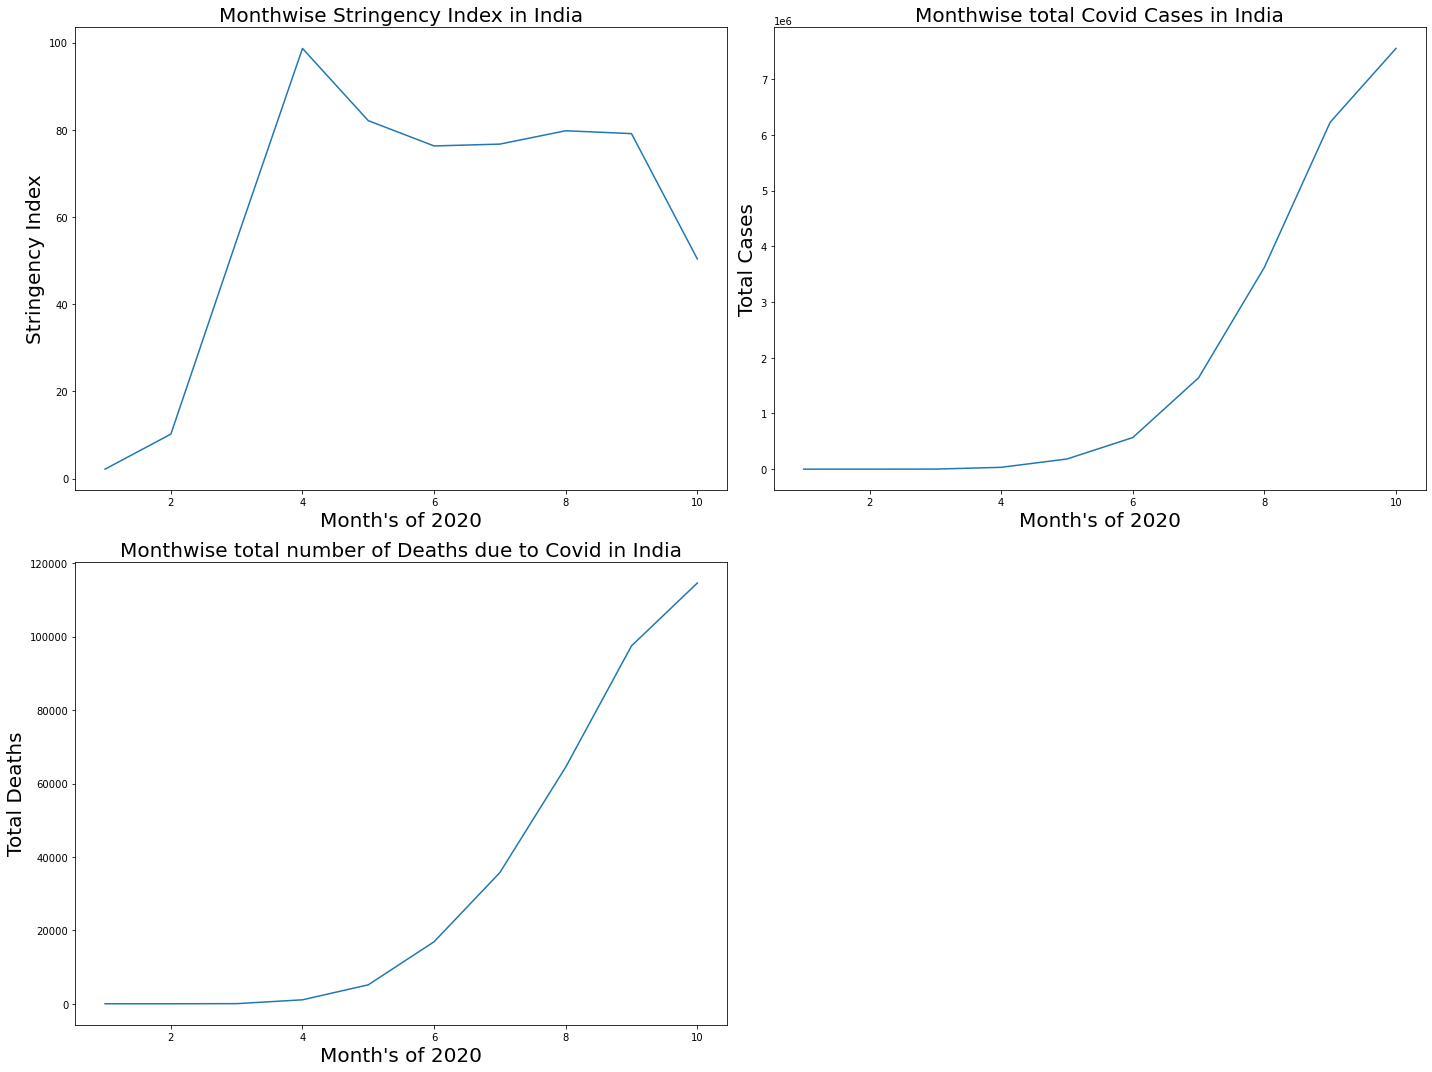

In [35]:
fig = plt.figure(figsize=(20,15))

ax1 = fig.add_subplot(2,2,1) 
ax1.plot(_df["month"], _df["stringency_index"], label="Stringency Index")
ax1.set_xlabel("Month's of 2020", fontsize=20)
ax1.set_ylabel("Stringency Index", fontsize=20)
ax1.set_title('Monthwise Stringency Index in India', fontsize=20)

ax2 = fig.add_subplot(2,2,2) 
ax2.plot(_df["month"], _df["total_cases"], label="Total Cases")
ax2.set_xlabel("Month's of 2020", fontsize=20)
ax2.set_ylabel("Total Cases", fontsize=20)
ax2.set_title('Monthwise total Covid Cases in India', fontsize=20)

ax3 = fig.add_subplot(2,2,3) 
ax3.plot(_df["month"], _df["total_deaths"], label="Total Deaths")
ax3.set_xlabel("Month's of 2020", fontsize=20)
ax3.set_ylabel("Total Deaths", fontsize=20)
ax3.set_title('Monthwise total number of Deaths due to Covid in India', fontsize=20)

plt.tight_layout()

### Plot of Stringency Index and total_cases for the top 20 highly populated countries

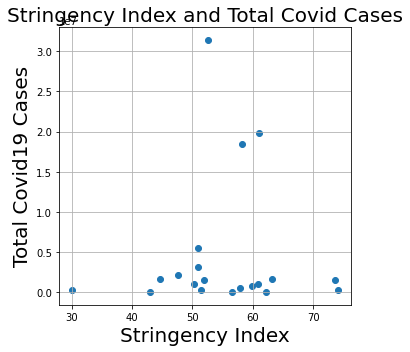

In [45]:
fig, ax = plt.subplots()
fig.set_size_inches(5, 5, forward=True)
ax.scatter(df_selcoun['SI'], df_selcoun['total_cases'])
ax.set_xlabel('Stringency Index', fontsize=20)
ax.set_ylabel('Total Covid19 Cases', fontsize=20)
ax.set_title('Stringency Index and Total Covid Cases', fontsize=20)
ax.grid(which='both')
plt.tight_layout()

### Plot of Stringency Index and total_deaths for the top 20 highly populated countries

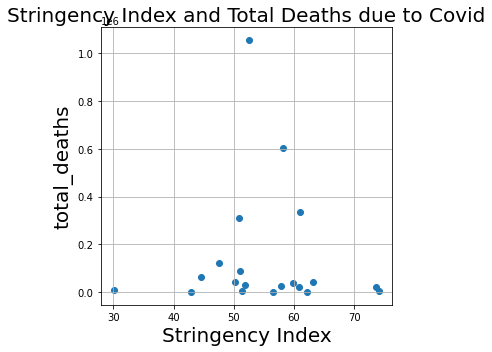

In [44]:
fig, ax = plt.subplots()
fig.set_size_inches(5, 5, forward=True)
# SI_sorted = df_selcoun.sort_values("SI", ascending=False)
ax.scatter(df_selcoun['SI'], df_selcoun['total_deaths'])
ax.set_xlabel('Stringency Index', fontsize=20)
ax.set_ylabel('total_deaths', fontsize=20)
ax.set_title('Stringency Index and Total Deaths due to Covid', fontsize=20)
ax.grid(which='both')
plt.tight_layout()